<a href="https://colab.research.google.com/github/CShorten/DataScienceHW/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Drive upload File

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
salaries = pd.read_csv('./drive/My Drive/salaries.csv')

In [ ]:
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


# Part 1 - Salaries

In [ ]:
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


# 1.1 Meaning of Each Variable

I think the best way to get a sense of each variable is to plot the distribution of values. From this we learn that:
<ul>
<li> <b>Earn-</b> Salaries follows a power-law distribution with nearly all people making between 0 - 50K, but a few making 75K and 100K+ </li>
<li> <b>Height-</b> Height is right-skewed normally distributed around 66 inches </li>
<li> <b>Sex-</b> We have more Females than Males </li>
<li> <b>Ed- </b> Education has an interesting distribution, it looks like somewhat of a power-law if you start the graph at 12 years of education </li>
<li> <b>Age-</b> Age kind of looks like a power-law distribution with most people between 20-30, but some as old as 90 </li>
<li> <b>Race- </b> Most people are White </li>

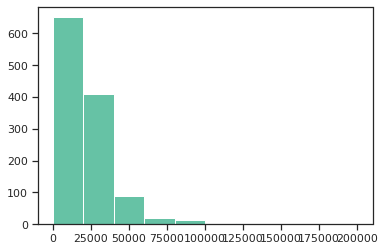

In [ ]:
plt.hist(salaries.earn)
plt.show()

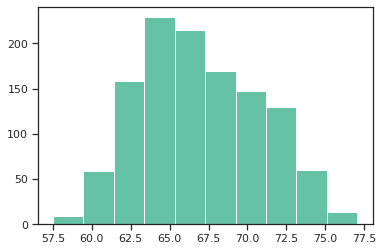

In [ ]:
plt.hist(salaries.height)
plt.show()

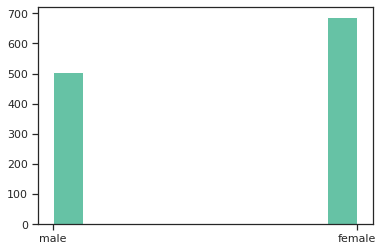

In [ ]:
plt.hist(salaries.sex)
plt.show()

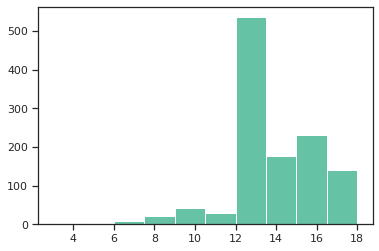

In [ ]:
plt.hist(salaries.ed)
plt.show()

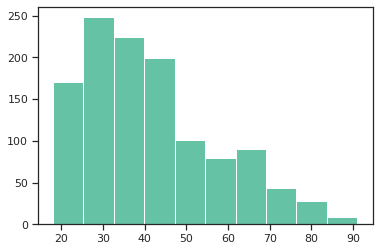

In [ ]:
plt.hist(salaries.age)
plt.show()

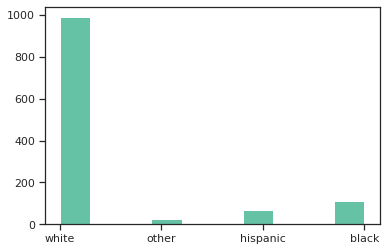

In [ ]:
plt.hist(salaries.race)
plt.show()

# Summary Statistics

In [ ]:
salary = np.array(salaries['earn'])
print('--- Salary statistics ---')
print('Minimum salary (global): ${:6.2f}'.format(np.min(salary)))
print('Maximum salary (global): ${:6.2f}'.format(np.max(salary)))
print('Average salary (global): ${:6.2f}'.format(np.mean(salary)))
print('Median salary (global): ${:6.2f}'.format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median salary (global): $20000.00


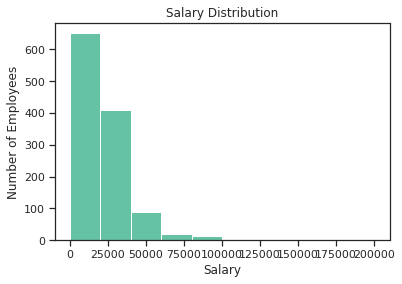

In [ ]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

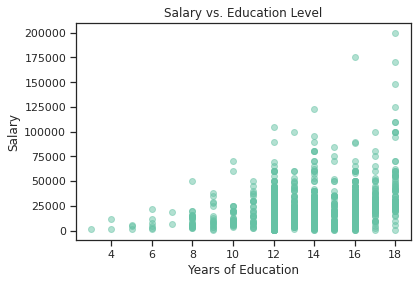

In [ ]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of Education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
corr, _ = pearsonr(salary, years)
print('Correlation coefficient: ', corr)

Correlation coefficient:  0.3399765246894847


# 1.2 - Exercise

Display total headcount and # of male and female employees

In [ ]:
len(df)

1192

In [ ]:
df.sex.value_counts()

female    687
male      505
Name: sex, dtype: int64

In [ ]:
males = df['sex'] == 'male'
females = df['sex'] == 'female'

In [ ]:
len(df[males])

505

In [ ]:
len(df[females])

687

Min, Max, Average, Median Salary per Gender

In [ ]:
male_salary = np.array(df[males].earn)
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(male_salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(male_salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(male_salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(male_salary)))

--- Salary statistics ---
Minimum salary (global): $1000.00
Maximum salary (global): $200000.00
Average salary (global): $29786.13
Median  salary (global): $25000.00


In [ ]:
female_salary = np.array(df[females].earn)
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(female_salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(female_salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(female_salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(female_salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $123000.00
Average salary (global): $18280.20
Median  salary (global): $15000.00


Highlight Gender Inequality associated with the Salaries in the Company

In [ ]:
earn_less_than_25000 = df['earn'] < 25000

In [ ]:
df.sex.value_counts()

female    687
male      505
Name: sex, dtype: int64

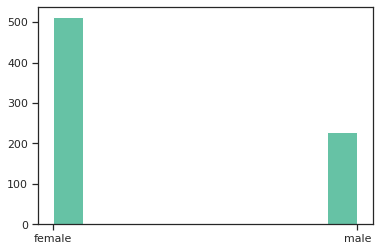

In [ ]:
plt.hist(df[earn_less_than_25000].sex)
plt.show()

In [ ]:
df[earn_less_than_25000].sex.value_counts()

female    512
male      228
Name: sex, dtype: int64

# Hypothesis Testing

<ul>
<li> H1: Older employees are paid less (i.e. ageism) </li>
<li> H2: Female employees are paid less (i.e. gender bias) </li>
<li> H3: Non-whites are paid less (i.e. race bias) </li>
</ul>

<h2> H1: Older Employees are Paid Less </h2>

In [ ]:
np_age = np.array(salaries['age'])
np_earn = np.array(salaries['earn'])
corr, _ = pearsonr(np_age, np_earn)
corr

0.08100297364190615

<h2> H2: Female Employees are Paid Less </h2>

In [ ]:
male = df['sex'] == 'male'
np_sex = np.array(male).astype(int)
corr, _ = pearsonr(np_sex, np_earn)
corr

0.2921021854657079

<h2> H3: Non-Whites are Paid Less </h2>

In [ ]:
white = df['race'] == 'white'
np_race = np.array(white).astype(int)
corr, _ = pearsonr(np_race, np_earn)
corr

0.08252109492218623

# Part 2 - Fuel Consumption

In [ ]:
import pandas as pd
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [ ]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


# 2.1 Exercises

Number of 3- and 5- cylinder vehicles in the dataset, count, and discard these rows

In [ ]:
data['cylinders'].value_counts()

4.0    199
8.0    103
6.0     83
3.0      4
5.0      3
Name: cylinders, dtype: int64

Compute and Display min, max, average fuel consumption for 4-, 6-, and 8- cylinder vehicles

In [ ]:
cylinder_mask = data.loc[(data['cylinders']==3.0) | (data['cylinders']==5.0)]
print(len(cylinder_mask))

7


Min, Max, and Average Fuel Consumption for 4-, 6-, and 8-cylinder vehicles

In [ ]:
cylinder_filter = data.loc[(data['cylinders']==4.0) |
                           (data['cylinders']==6.0) |
                           (data['cylinders']==8.0)]

In [ ]:
cylinder_filter['mpg'].min()

9.0

In [ ]:
cylinder_filter['mpg'].max()

46.6

In [ ]:
cylinder_filter['mpg'].sum() / len(cylinder_filter)

23.445454545454545

Display the name of the most and least fuel efficient vehicles in the dataset

Least Fuel Efficient

In [ ]:
# Assuming fuel efficiency references mpg
data['mpg'].min()

9.0

In [ ]:
data.loc[data['mpg']==9.0].car_name

34    hi 1200d
Name: car_name, dtype: object

Most Fuel Efficient

In [ ]:
data['mpg'].max()

46.6

In [ ]:
data.loc[data['mpg']==46.6].car_name

329    mazda glc
Name: car_name, dtype: object

# 2.2 Relationship Plotting

In [ ]:
# reminder of the names of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    float64
 7   origin        392 non-null    float64
 8   car_name      392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


Fuel Consumption and Displacement (Engine Size)

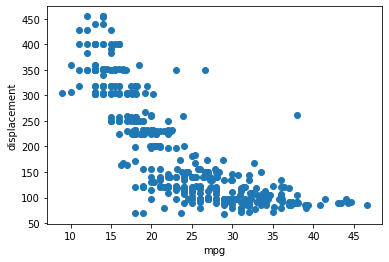

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['mpg'], data['displacement'])
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.show()

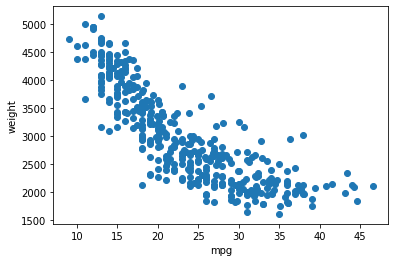

In [ ]:
plt.scatter(data['mpg'], data['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

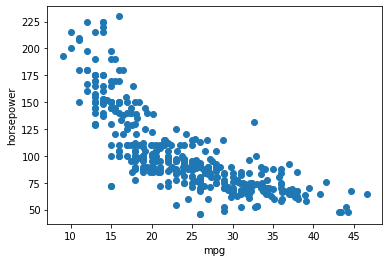

In [ ]:
plt.scatter(data['mpg'], data['horsepower'])
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.show()

# 2.3 Hypotheses H4 and H5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    float64
 7   origin        392 non-null    float64
 8   car_name      392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


# H4: Fuel Efficiency improved over the years represented in this dataset (1970 - 1982)

In [ ]:
data['model'].value_counts()

73.0    40
78.0    36
76.0    34
82.0    30
75.0    30
79.0    29
70.0    29
81.0    28
77.0    28
72.0    28
80.0    27
71.0    27
74.0    26
Name: model, dtype: int64

In [ ]:
# assuming model references the year it came out
year_mask = data.loc[(data['model'] >= 70.0) & (data['origin'] <= 82.0)]
len(year_mask)

392

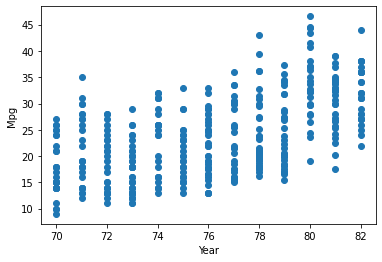

In [ ]:
# unnecessary, so we will just use data from here on out
plt.scatter(data['model'], data['mpg'])
plt.xlabel('Year')
plt.ylabel('Mpg')
plt.show()

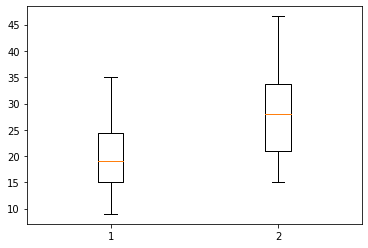

In [ ]:
# Boxplot
mpg_1976_to_1970 = data.loc[(data['model'] <= 76.0)].mpg
mpg_1977_to_1982 = data.loc[(data['model'] >= 77.0)].mpg

plot_data = [mpg_1976_to_1970, mpg_1977_to_1982]
plt.boxplot(plot_data)
plt.show()

# H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    float64
 7   origin        392 non-null    float64
 8   car_name      392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


In [ ]:
data['origin'].value_counts()

1.0    245
3.0     79
2.0     68
Name: origin, dtype: int64

In [ ]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    float64
 7   origin        392 non-null    float64
 8   car_name      392 non-null    object 
 9   Country_code  392 non-null    object 
dtypes: float64(8), object(2)
memory usage: 33.7+ KB


In [ ]:
data['Country_code'].value_counts()

USA       245
Japan      79
Europe     68
Name: Country_code, dtype: int64

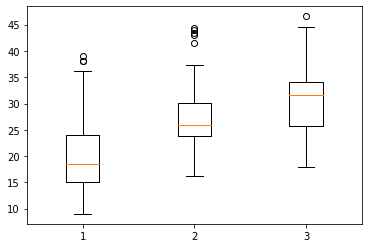

In [ ]:
usa_mpg = data.loc[(data['Country_code'] == 'USA')].mpg
europe_mpg = data.loc[(data['Country_code'] == 'Europe')].mpg
japanese_mpg = data.loc[(data['Country_code'] == 'Japan')].mpg

plot_2_data = [usa_mpg, europe_mpg, japanese_mpg]
plt.boxplot(plot_2_data)
plt.show()

# Conclusions

<h2> What have you learned from this assignment? </h2>
<ul>
<li> Pandas indexing based on conditions using the .loc syntax </li>
<li> Didn't know how to make multiple boxplots before </li>
<li> Enjoyed exercise of thinking about hypotheses and relationshisp beteween variables </li>
</ul>

<h2> Which parts were the most fun, time-consuming, enlightening, tedious? </h2>

<p> I really like the scatter plot visualization between variables. I didn't think anything was overly time-consuming or tedious. Gaining comfort with the .loc conditional indexing syntax was enlightening. </p>

<h2> What would you do if you had an additional week to work on this? </h2>

<ul>
<li> Add Linear Regression relationship on the Scatter Plots </li>
<li> Use Features to Predict MPG </li>
<li> Play with Feature Engineering by using Regex on the Car_Name to get a Brand Feature </li>
</ul>